## QUESTION
 15 – Find a minimum cut for a given undirected graph $\mathcal{G(V, E)}$, with $n$ vertices and $m$ edges. A minimum cut of G is a partition of the graph's vertices into two complementary sets $S$ and $T$, such that the number of edges between the set $S$ and the set $T$ is as small as possible.

# LIBRARIES
> random:
   - make random selections of elements in list
   - generate random numbers
    
> time:
  - timing of function executions
   
> os:
  - interact with OS
  - file and directory path manipulations
   
> shutil.rmtree:
  - remove non empty and directories which is unavailable in os package
 
> numpy:
  - array and matrix operations
 
> itertools.combination:
  - generate combinations of elements in a container

> mathplotlib.pyplot:
  - graphing and plotting operations.

> networkx:
  - graph generation and manipulations
  - the erdos_renyi_graph graphs were generated given the number of nodes to consider and probability of including an edge. A default value of $p=0.6$ was chosen. Which could be interpreted as $60\%$ of the vertices should be included in the graph out of the total $\frac{n(n-1)}2$ edges for the complete representation. 


In [1]:
import random, os, time
from shutil import rmtree
import numpy as np
import networkx as nx
from itertools import combinations
from matplotlib import pyplot as plt


# BASE / AUXILLARY CLASS
> CreateDirectory
 - creates requested directory of the given directory name (dir_name)
 - returns the path of created directory
 
> GenerateGraphs
 - generates random undirected erdos_renyi_graph of edge weight=1 for all edges(number of edges connecting both nodes).
 - specified number of vertices (nodes), and probability of edge inclusion.
 - save graph files in pickle into **./graphs/** directory. save as *.gpickle* file
 - plot graph if requested.
 
> LoadGraph
 - load graph of given node from the specified directory present in **./graphs/**. Example *./graphs/pickles/*
 - sets the loaded graph into context.
 - plot graph if graph file exists.
 
> PlotGraph
 - plots graph given various parameters.
 - generates 2 groups of colours for nodes if specified.
 - save graph to specified directory in **./graphs/**. 
 - draw graph with edge weights or not if specified.
 - file_name to save graph if specified.

In [2]:
class BaseMinCut:
    
    graph = None
    adjacency_matrix = None
    graph_directory = os.path.join(os.getcwd(),'graphs')

    def CreateDirectory(self, dir_name=None, remove_existing=False):
        """
        Args:
            dir_name [str]  - the directory to save graphs in. creates a directory name in self.graph_directory
            remove_existing [bool] - determines whether or not to remove existing folder.
        Returns:
            dir_path [str] - path to the directory just created.
        """
        dir_path = self.graph_directory
        if dir_name is not None:
            dir_path = os.path.join(dir_path, dir_name)

        # removes the directory if True. Does not, otherwise
        if remove_existing is True:
            if os.path.exists(dir_path):
                rmtree(dir_path)

        # creates directory if does not exist already
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)

        return dir_path

    
    def GenerateGraphs(self, number_of_graphs=5, prob_edge_inclusion=0.6, dir_name=None, plot_graph=False, remove_existing=False):
        """
        plots the generated graphs with their node and edge counts.
        saves generated graphs along with their plots in the graphs directory

        Args:
            number_of_graphs [int] - number of graphs to generate. default 5
            prob_edge_inclusion [float] - since the number of vertices sharing an edge should be randomly determined. this the prob of including an edge.
            dir_name [str] - name of the folder to save graphs in.
            plot_graph [bool] - plots the graph if True.       
            remove_existing [bool] - deletes existing directory.  
        """
        save_path = self.graph_directory
        if dir_name is not None:
            save_path = self.CreateDirectory(dir_name=dir_name, remove_existing=remove_existing)
        
        assert number_of_graphs > 2, 'Number of Graphs to generate must be greater than 2'

        for node in range(2, number_of_graphs+1):
            graph = nx.generators.random_graphs.erdos_renyi_graph(n=node, p=prob_edge_inclusion, seed=self.student_number, directed=False)
            nx.set_edge_attributes(graph, values = 1, name = 'weight')
            nx.write_gpickle(graph, os.path.join(save_path, f'{node}.gpickle'))
               
            if plot_graph is True:
                self.PlotGraph(graph=graph, save_plot=True)

    
    def LoadGraph(self, nodes, dir_name=None):
        """
        loads saved graph of given node.
        plots the graph with the specified node if exists.

        Args:
            node [int, str] - graph file containning node number of nodes.
            graph_path [str] - path to graph file directory to load from. defaults to graphs_directory.
        Sets:
            self.graph [nx.Graph] - the graph with corresponding number of nodes fetched
        """
        try:
            dir_path = self.graph_directory
            if dir_name is not None:
                dir_path = os.path.join(dir_path, dir_name)

            graph_files = [filename for filename in os.listdir(dir_path) if filename.endswith('.gpickle')]
            
            # load the last file in the directory if file not found
            if nodes is None:
                nodes = random.choice(graph_files)[-1]

            # check if queried graph exists or not. return error if not
            graph_name = f'{nodes}.gpickle'
            assert graph_name in graph_files, f'graph file with nodes {nodes} not found'

            graph = nx.read_gpickle(os.path.join(dir_path, graph_name))
            self.graph = graph # set graph of class

            print(f'Graph with {nodes} vertices loaded!!')
        except FileNotFoundError:
            return f'No graph file with {nodes} vertices!!'


    def PlotGraph(self, graph=None, save_plot=False, dir_name=None, remove_existing=False, with_weights=False, color_diff=None, file_name=None):
        """
        plot the given graph and return 1 on success
        Args:
            graph [nx.Graph] - the graph to plot
            save_graph [bool] - if true, saves the graph. default not to save graph.
            save_path [tuple] - directories to save file in
        """
        if graph is None:
            graph = self.graph
        
        # Defines color for some selected nodes to be colored differently
        color_map = None
        if color_diff is not None:
            if not isinstance(color_diff, list):
                color_diff = list(color_diff)
            color_map = []
            for node in graph:
                if node in color_diff:
                    color_map.append('red')
                else: 
                    color_map.append('tab:blue')      

        # plot graph positions of vertices and edges
        pos=nx.spring_layout(graph)
        
        if color_diff is not None:
            nx.draw(graph, pos, node_color=color_map, with_labels=True, node_size=700, font_size=18)
        else:
            nx.draw(graph, pos, with_labels=True, node_size=700, font_size=18)

        # plot with weighted edges if requested
        if with_weights is True:
            nx.draw_networkx_edge_labels(graph,pos)

        plt.title(f'Graph with {len(graph.nodes)} nodes and {len(graph.edges)} edge(s)')
        
        # build path and save graph
        if save_plot is True:
            save_path = self.graph_directory
            if dir_name is not None:
                save_path = self.CreateDirectory(dir_name=dir_name, remove_existing=remove_existing)
            filename = f'{len(graph.nodes)}.png'
            if file_name is not None:
                filename = f'{file_name}.png'
            plt.savefig(os.path.join(save_path, filename))
        plt.show()
        




# MAIN CLASS
> ExhaustiveSearch
  - generate complementary partitions *GetCompPartitions*
  - compute cut for each partition *GetPartCut*
  - choose the smallest partition with smallest cut size. *(min_cut_set, min_cut_size)*

> GreedyHeuristic
  - select the vertex with the minimum/smallest number of neighbors. *GetVertexDegree*
  - report the smallest degree as minimum cut and corresponding vertex as element of the complementary partition.
 
> ProbabilisticRandomized
  - select at random an edge from the edge set.
  - merge the vertices connecting this edge, and update the new superedge weight as the total number of contributing edges.
  - perform this process until only two (2) vertices remain. *UpdateGraph*
  - probability of realizing the exact minimum cut is $$\mathcal{P} = \frac{1}{{n\choose 2}}$$

> ImprovedProbabilisticRandomized
  - perform the *ProbabilisticRandomized* algorithm multiple times to increase the probability of obtaining the correct minimum cut.
  - number of trials proposed is expressed as $\left(C\cdot {n\choose 2}\cdot \ln n\right)$ with probability $$\mathcal{P}\ge \left(1-\dfrac{1}{n^C}\right)$$ where $C\in \mathcal{N}$, $n=|\mathcal{V}|$
   

In [3]:
class MinCut(BaseMinCut):
    """
    - This module implements a Brute-Force, Greedy-Heuristic and Probabilistic-Randomized technique to compute the minimum cut of a given graph.
    - Improvement of the probabilistic Randomized technique was also proposed.
    - Given a complementary partition of the graph G, a Cut in this context is the number of edges connecting these two disjoint sets.
    - Thus, the Minimum Cut is the smallest Cut of all possible complementary partitions of the graph.
    """

    def __init__(self):
        """
        initialize parameters.
        """
        self.student_number = 106382
        random.seed(self.student_number) # random number initializer
        self.min_cut = None


    def GetPartCut(self, vset1, vset2, adjacency_matrix=None):
        """        
        Implementation:
            - This method computes the cut for a given complementary sets vset_1 and vset_2
            - For each vertex v1 in vset1, update Num_Cuts by the number of edges connecting v1 and vertices in vset_2
        Args:
            vset1 [set] - first set of vertices partition.
            vset2 [set] - second set of vertices partition.
        Returns:        
            cut_size [int] - the number of the edges connecting vset1 and vset2 (cut)

        """
        if adjacency_matrix is None:
            adjacency_matrix = self.adjacency_matrix

        cut_size = 0
        for v1 in vset1:
            for v2 in vset2:
                if adjacency_matrix[v1,v2]:
                    cut_size += 1
        return cut_size


    def GetCompPartitions(self, V=None):
        """
        This function returns all valid non-alternating complementary partitions of the given vertices set.
        
        Implementation:
            - We generate all non-empty complementary partitions of the vertex set V via subsets of V.
            - Keep first half of the non-empty partitions generated, since the last half all happen to be alternations of first half or repetitions.  
        Args:
            V [list] - array of vertices of graph.
        Returns:
            CompParts [list] - all possible complementary partitions of the vertices set V. No permutations and empty partition sets
        """
        if V == None:
            V = list(self.graph.nodes())

        # Ensures input vertices set is list fornatted
        if not isinstance(V, list):
            V = list(V)

        CompParts = [] # complementary partitions container
        Powerset = [subset for subset_index in range(len(V)+1) for subset in combinations(V,subset_index)] # len(Powerset) = 2**len(V)
        for subset in Powerset:
            vset_1 = set(subset)
            if (len(vset_1) == 0) or (len(vset_1) == len(V)):
                continue
            vset_2 = set(V) - vset_1 # complementary subset
            CompParts.append((vset_1, vset_2))

        # Take First half since second half is simply permutations of first half.
        CompParts = CompParts[:(len(CompParts)//2)] 
        return CompParts


    def ExhaustiveSearch(self, graph=None):
        """
        Implementation:
            - Exhaustive search means we try every possible solution to the problem and choose the best one that statisfies the objective.
            - So in this case, it means we figure out all the possible cuts of the graph and then we pick the smallest cut as our minimum cut.
            - The main strength of the Exhaustive Search is that it is guaranteed to find the best optimal solution from all possible solutions, in this case, all cuts.
            - The deficiency of this algorithm is that it takes a long time to complete execution for graphs with larger Vertices and/or edges. 
        Args:
            graph [nx.Graph] - Graph to compute its min_cut.
        Returns:
            min_cut_size [int] - The min_cut for the given graph.
            min_cut_set [tuple] - actual complementary partition corresponding to the minimum cut.
        """
        
        if graph is None:
            graph = self.graph

        assert isinstance(graph, nx.classes.graph.Graph), 'specified graph is not valid!'

        min_cut_size = np.infty
        min_cut_set = None

        CompParts = self.GetCompPartitions(V=graph.nodes) # set of the indices of the adjacency matrix is the set of nodes
        
        for vset1, vset2 in CompParts: # (2**n - 2)/2 items = 2**(n-1)-1
            
            adjacency_matrix = nx.adjacency_matrix(graph).todense()
            cut_size = self.GetPartCut(vset1, vset2, adjacency_matrix=adjacency_matrix)
            
            if cut_size < min_cut_size:
                min_cut_size = cut_size
                min_cut_set = (vset1,vset2)

        return min_cut_set, min_cut_size


    def GetVertexDegree(self, vertex=None, adjacency_matrix=None):
        """
        Implementation:
            - This method computes the number of immediate neighbors of given vertex in an adjacency matrix or graph.
        Args:
            vertex [int] - the node of the graph to compute its degree
        Returns:
            degree [int] - number of immediate neighbors of vertex input
        """
        if adjacency_matrix is None:
            adjacency_matrix = nx.adjacency_matrix(self.graph).todense()

        assert isinstance(adjacency_matrix, np.matrix), 'Please specify a valid adjacency matrix!!'

        neighbors = adjacency_matrix[vertex]
        degree = np.sum(neighbors)
        return degree


    def GreedyHeuristic(self, graph=None, plot_graph=False):
        """
        Implementation:
            - An individual instance of the exhaustive search iteration could be the result of the greedy search algorithm. 
            - A greedy search algorithm will make a locally optimal choice in the process hoping that this will result in a globally optimal solution. 
            - Where as an exhaustive search will look at all possible solutions and pick the most optimal one.
            - Thus, this algorithm runs faster as compared to the Exhaustive serch.
        Args:
            graph [nx.Graph] - The graph to compute its minimum cut
        Returns:
            min_cut [int] - the estimated minimum cut using a greedy heuristics technique

        """
        if graph == None:
            graph=self.graph

        assert isinstance(graph, nx.classes.graph.Graph), 'specified graph is not valid!'
        
        min_cut_size = np.infty
        min_cut_set = None

        vertices = graph.nodes()
        adjacency_matrix = nx.adjacency_matrix(graph).todense() # get adjacency matrix from graph object

        if plot_graph is True:
            self.PlotGraph(graph=graph, color_diff=[min_cut_set], save_plot=True, dir_name='greedy')

        for vertex in vertices:
            cut_size = self.GetVertexDegree(vertex=vertex, adjacency_matrix=adjacency_matrix)
            
            # check if cut size is smaller than mincut recorded
            if cut_size < min_cut_size:
                min_cut_size = cut_size
                min_cut_set = vertex

        if plot_graph is True:
            self.PlotGraph(graph=graph, color_diff=[min_cut_set], save_plot=True, dir_name='greedy', file_name='selected')

        return (set([min_cut_set]), set(vertices)-set([min_cut_set])), min_cut_size


    def UpdateGraph(self, graph, edge_to_merge):
        """
        Args:
            graph [nx.Graph] - graph to update.
            edge_to_merge [tuple] - (u,v) edge to merge into a supernode. merge node, 
        Returns:
            updated_graph [nx.Graph] - updated graph with sink, source merged into a new_edge 
        """
        u = edge_to_merge[0]
        v = edge_to_merge[1]

        supernode = f'{u}.{v}' # define supernode as the str. forinstance 0.4 for u=0, v=4
        graph.add_node(supernode) # add supernode to graph

        # create connections from supernode to vertices connected to immediate neighbors of contributing vertices of the supernode.
        u_neighbors = [sink for source, sink in graph.edges(u)]
        for neighbor in u_neighbors:
            if neighbor != v:

                # creates a superedge between supernode and new vertex, whose weight is that of contributing edge.
                edge_weight = graph[u][neighbor]['weight'] # get weight of current edge
                graph.add_edge(supernode, neighbor, weight=edge_weight)
        
        v_neighbors = [sink for source, sink in graph.edges(v)]
        for neighbor in v_neighbors:
            if neighbor != u:
                weight = graph[v][neighbor]['weight'] # get weight of current edge

                # Update superedge weight by adding weight to existing weight if supernode already exists.
                # Needed for second vertex search, since a superedge may already be defined. If no supernode exists, weight is same as contributing edge weight.
                if graph.has_edge(supernode, neighbor):
                    graph[supernode][neighbor]['weight'] += weight
                else:
                    graph.add_edge(supernode, neighbor, weight=weight)
        
        # no use for edge_to_merge since the vertex has been successfully merged
        graph.remove_nodes_from([u,v])

        return graph
    

    def ProbabilisticRandomized(self, graph=None, plot_graph=False):
        """
        Implementation:
            - randomly select an edge from the graph, merge the vertices into a supernode.
            - update the weight of the edges from all other vertices to this supernode by the sum of weights of contributing edges.
            - repeat steps (1) and (2) until only one edge remains in the graph. The weight of this edge represents the minimum cut of the graph.
        Main Args:
            graph [nx.Graph] - graph to estimate its minimum cut.   
        Optional Args: 
            plot_graph [bool] - indicates whether to plot the resulting graph
        returns:
            min_cut_size [int] - the weight of a superedge.
            min_cut_set [tuple] - the final superedge with cut_size as weight.

        """
        if graph is None:
            graph = self.graph.copy()

        assert isinstance(graph, nx.classes.graph.Graph), 'specified graph is not valid!'

        # initial graph saved before merging starts
        if plot_graph is True:
            self.PlotGraph(graph=graph, save_plot=True, dir_name='ProbRandom', remove_existing=True, with_weights=True) 
        
        # merge edges until only one (1) superedge remains or two (2) vertices remains.
        while len(graph.edges()) > 1: 
            
            edge_to_merge = random.choice(list(graph.edges())) # choose random edge to merge
            
            # all nodes to be merged identified
            if plot_graph is True:
                self.PlotGraph(graph=graph, save_plot=True, dir_name='ProbRandom', color_diff=edge_to_merge, with_weights=True)

            # merge edge, update graph
            graph = self.UpdateGraph(graph, edge_to_merge)

        # ensures the final graph saved
        if plot_graph is True:
            self.PlotGraph(graph=graph, save_plot=True, dir_name='ProbRandom', color_diff=edge_to_merge, with_weights=True)

            
        # return weight of superedge as minimum cut
        min_cut_size = list(nx.get_edge_attributes(graph, 'weight').values())[0]
        min_cut_set = list(nx.get_edge_attributes(graph, 'weight').keys())[0]
        
        return min_cut_set, min_cut_size
        

    def ImprovedProbabilisticRandomized(self, graph=None, C=1, plot_only_cuts=False):
        """
        Args:
            graph [nx.Graph] - The graph to find its minimum cut
            C [int] - parameter to compute number of trials to perform. defaults to 2
            plot_only_cuts [bool] - plot only computed final cut not intermediates
        """

        if graph is None:
            graph = self.graph

        assert isinstance(graph, nx.classes.graph.Graph), 'specified graph is not valid!'

        n = len(graph.nodes)
        Num_Trials = C*len(list(combinations([_ for _ in range(n)],2)))*np.log(n)
        Num_Trials = int(Num_Trials) # convert to whole integer value

        # print('Number of trials : ', Num_Trials)

        # plots intial graph
        if plot_only_cuts is True:
            self.PlotGraph(graph, save_plot=True, dir_name='ImpProbRand', with_weights=True)

        min_cut_size = np.inf
        min_cut_set = None
        for trial in range(Num_Trials):    
            # edges are contracted for each graph so we instead, send a copy for computation
            graph_copy = graph.copy()
            cut_set, cut_size = self.ProbabilisticRandomized(graph_copy)
            
            # all cuts are saved
            if plot_only_cuts is True:
                self.PlotGraph(graph_copy, save_plot=True, dir_name='ImpProbRand', with_weights=True)

            if min_cut_size > cut_size:
                min_cut_size = cut_size
                min_cut_set = cut_set
        
        return min_cut_set, min_cut_size

 # instantiate an object
MC = MinCut()

### GENERATE AND LOAD GRAPHS

In [4]:
# GENERATE GRAPHS
MC.GenerateGraphs(number_of_graphs=30, prob_edge_inclusion=0.6, dir_name='pickles')
# MC.LoadGraph(nodes=5, dir_name='pickles')
# MC.PlotGraph(with_weights=False)

In [5]:
## COUNTER GRAPH FOR GREEDY-HEURESTICS. WHERE IT FAILS TO REPORT EXACT MINCUT
# counter_graph = nx.Graph(
# counter_graph.add_nodes_from([_ for _ in range(8)], size=8)
# counter_graph.add_edges_from([(0,1),(0,2),(0,3),(2,3),(1,2),(1,3)])
# counter_graph.add_edges_from([(4,5),(4,6),(4,7),(6,7),(5,6),(5,7)])
# counter_graph.add_edges_from([(2,4),(3,5)])
# MC.GreedyHeuristic(graph=counter_graph, plot_graph=Tr)ue)


In [6]:
# GRAPHS CONSIDERED
MC.LoadGraph(nodes=5, dir_name='pickles')
graph_1 = MC.graph.copy()

MC.LoadGraph(nodes=10, dir_name='pickles')
graph_2 = MC.graph.copy()

MC.LoadGraph(nodes=15, dir_name='pickles')
graph_3 = MC.graph.copy()

MC.LoadGraph(nodes=20, dir_name='pickles')
graph_4 = MC.graph.copy()

MC.LoadGraph(nodes=25, dir_name='pickles')
graph_5 = MC.graph.copy()

Graph with 5 vertices loaded!!
Graph with 10 vertices loaded!!
Graph with 15 vertices loaded!!
Graph with 20 vertices loaded!!
Graph with 25 vertices loaded!!


### TIMED EXECUTIONS

In [7]:
print('TIMED EXECUTIONS')
print('Nodes\t|Brute-Force\t|Greedy\t|RandomProbability\t|ImpRandomProb')

# considering graphs 5,10,15,20,25
for graph in [graph_1, graph_2, graph_3, graph_4, graph_5]:
    
    nodes = len(graph.nodes())
    
    brute_start = time.time()
    MC.ExhaustiveSearch(graph)
    brute_stop = time.time()

    greedy_start = time.time()
    MC.GreedyHeuristic(graph)
    greedy_stop = time.time()

    probrand_start = time.time()
    MC.ProbabilisticRandomized(graph)
    probrand_stop = time.time()

    impprobrand_start = time.time()
    MC.ImprovedProbabilisticRandomized(graph)
    impprobrand_stop = time.time()
    
    print(f'{nodes}\t|{brute_stop-brute_start}\t|{greedy_stop-greedy_start}\t|{probrand_stop-probrand_start}\t|{impprobrand_stop-impprobrand_start}')
    

TIMED EXECUTIONS
Nodes	|Brute-Force	|Greedy	|RandomProbability	|ImpRandomProb
5	|0.14546775817871094	|0.0006570816040039062	|0.0	|0.0
10	|0.07901906967163086	|0.0010008811950683594	|0.0	|0.0
15	|3.4797348976135254	|0.0	|0.0009989738464355469	|0.0
20	|142.15208768844604	|0.0010204315185546875	|0.0009937286376953125	|0.0


### GRAPH COMPLEXITIES

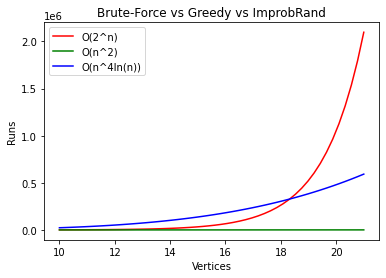

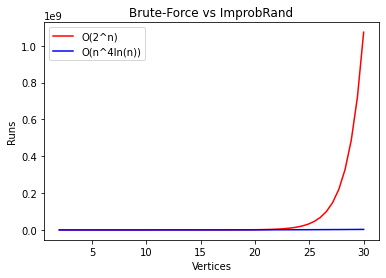

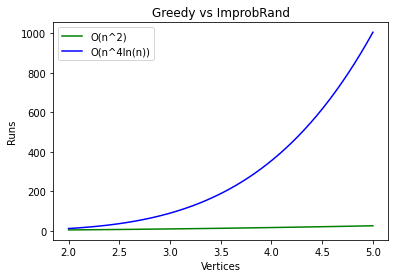

In [48]:
# Graph of ALL various complexities
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n = np.linspace(10,21)
plt.plot(n, 2**n, '-r', label='O(2^n)') # Brute-Force
plt.plot(n, n**2,'-g', label='O(n^2)') # Greedy, ProbRand
plt.plot(n, (n**4)*np.log(n),'-b', label='O(n^4ln(n))') # ImpProbRand
plt.title('Brute-Force vs Greedy vs ImprobRand')
plt.xlabel('Vertices')
plt.ylabel('Runs')
plt.legend(loc='upper left')
plt.show()

# Brute-Force vs ImpProbRand
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n = np.linspace(2,30)
plt.plot(n, 2**n, '-r', label='O(2^n)') # Brute-Force
plt.plot(n, (n**4)*np.log(n),'-b', label='O(n^4ln(n))') # ImpProbRand
plt.title('Brute-Force vs ImprobRand')
plt.xlabel('Vertices')
plt.ylabel('Runs')
plt.legend(loc='upper left')
plt.show()

# Greedy vs ImpProbRand
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n = np.linspace(2,5)
plt.plot(n, n**2,'-g', label='O(n^2)') # Greedy, ProbRand
plt.plot(n, (n**4)*np.log(n),'-b', label='O(n^4ln(n))') # ImpProbRand
plt.title('Greedy vs ImprobRand')
plt.xlabel('Vertices')
plt.ylabel('Runs')
plt.legend(loc='upper left')
plt.show()